# Exploratory Data Analysis (EDA) for Sales Dataset

In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:

# Configure visualization
sns.set_theme()

# Load dataset
file_path = "sales_data.csv"
df = pd.read_csv(file_path)

Let's look on the data

In [43]:
# Display basic info
df.head()

,Unnamed: 0,shop_id,date,item_name,n_sold,price,promotion,category
0,0,1,2021-01-02,cucumber,367.0,8.50,False,Vegetables
1,1,1,2021-01-02,bun,947.0,3.61,False,Bakery
2,2,1,2021-01-02,salad,459.0,9.90,False,Vegetables
3,3,1,2021-01-02,baguette,1343.0,3.90,False,Bakery
4,4,1,2021-01-03,cucumber,391.0,8.50,False,Vegetables


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3229 non-null   int64  
 1   shop_id     3229 non-null   int64  
 2   date        3229 non-null   object 
 3   item_name   3229 non-null   object 
 4   n_sold      3227 non-null   float64
 5   price       3229 non-null   float64
 6   promotion   3229 non-null   bool   
 7   category    3229 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 179.9+ KB


In [45]:
# Categorical data
df.describe(include="object")

,date,item_name,category
count,3229,3229,3229
unique,451,4,2
top,2021-01-02,bun,Bakery
freq,8,902,1803


In [46]:
# Numerical data
df.describe()

,Unnamed: 0,shop_id,n_sold,price
count,3229.000000,3229.000000,3227.000000,3229.000000
mean,1614.000000,1.499535,1830.472265,6.142948
std,932.276336,0.500077,2213.719258,2.579138
min,0.000000,1.000000,-295.000000,0.000000
25%,807.000000,1.000000,650.000000,3.900000
50%,1614.000000,1.000000,1242.000000,4.500000
75%,2421.000000,2.000000,2458.000000,8.500000
max,3228.000000,2.000000,77600.000000,39.000000


It seems there are some issues in n_sold. There are 2 null values and values go from negative to almost 80 000. Let's check the null values first.

In [47]:
# Show all rows that contain at least one missing value
df[df.isnull().any(axis=1)]

,Unnamed: 0,shop_id,date,item_name,n_sold,price,promotion,category
590,590,1,2021-06-01,salad,NaN,9.9,False,Vegetables
2500,2500,2,2021-08-14,baguette,NaN,3.9,False,Bakery


We could drop the rows with missing values but I think it will be better to try to fill them. Let's visualize the data first.

In [66]:
# Set the visual theme and the size of the plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [ ]:
# Create a function so we can reuse it for both shops
def plot_shop_sales_with_promotions(dataframe, shop_id):
    """
    Generates a line plot of daily sales for a specific shop,
    with markers for promotions.
    """
    # --- 1. Filter data for the specific shop ---
    df_shop = dataframe[dataframe['shop_id'] == shop_id].copy()

    # --- 2. Aggregate sales data for the line plot ---
    daily_item_sales = df_shop.groupby(['date', 'item_name'])['n_sold'].sum().reset_index()

    # --- 3. Get data for promotion markers ---
    # Find the dates and items where a promotion occurred
    promotion_dates = df_shop[df_shop['promotion'] == True][['date', 'item_name']].drop_duplicates()
    # Merge with daily sales to get the correct y-value (n_sold) for the markers
    promotion_markers = pd.merge(promotion_dates, daily_item_sales, on=['date', 'item_name'])


    # --- 4. Create the Plot ---
    plt.figure(figsize=(14, 7))

    # Create the base line plot
    sns.lineplot(
        data=daily_item_sales,
        x='date',
        y='n_sold',
        hue='item_name'
    )

    # Overlay the scatter plot markers for promotions
    sns.scatterplot(
        data=promotion_markers,
        x='date',
        y='n_sold',
        hue='item_name',
        marker='X',
        s=150,          # Size of the marker
        color='black',
        legend=False    # Don't create a separate legend for markers
    )

    # --- 5. Set Title and Labels ---
    plt.title(f'Daily Sales Volume for Shop ID: {shop_id} (X marks promotions)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Items Sold (n_sold)', fontsize=12)
    plt.legend(title='Item Name')
    plt.tight_layout()
    plt.show()

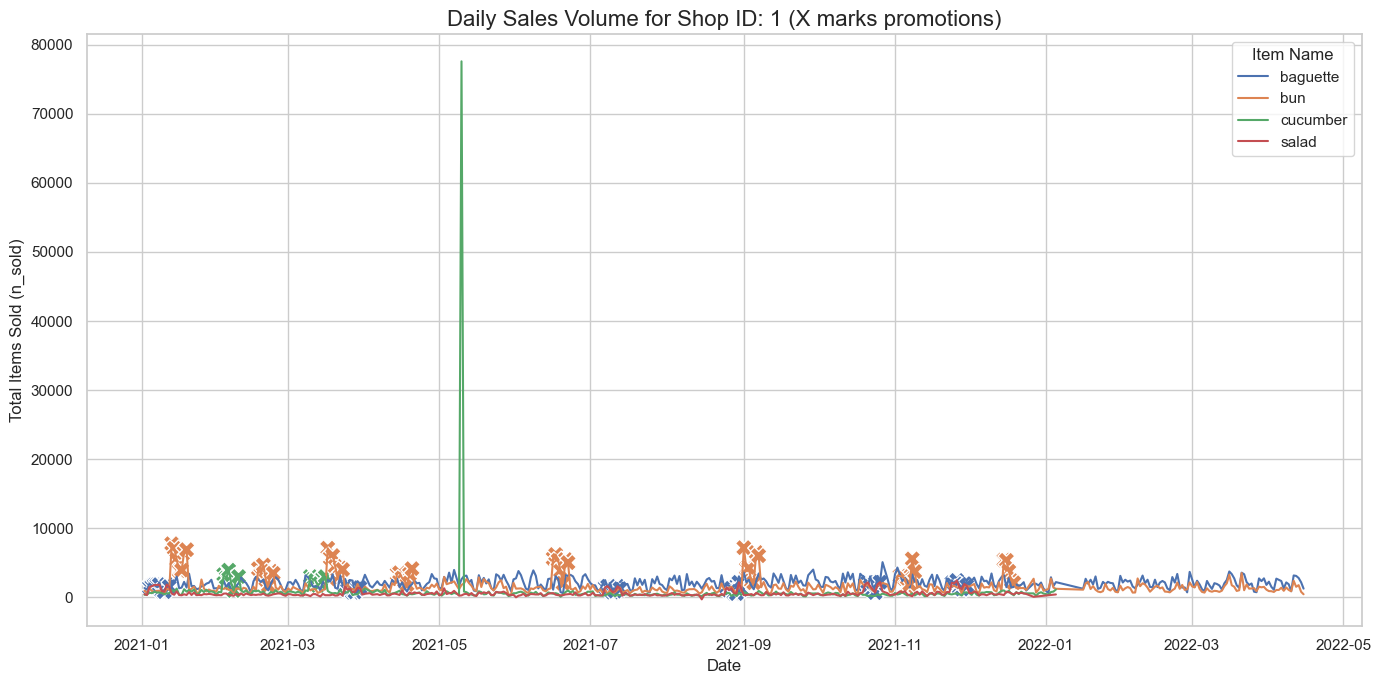

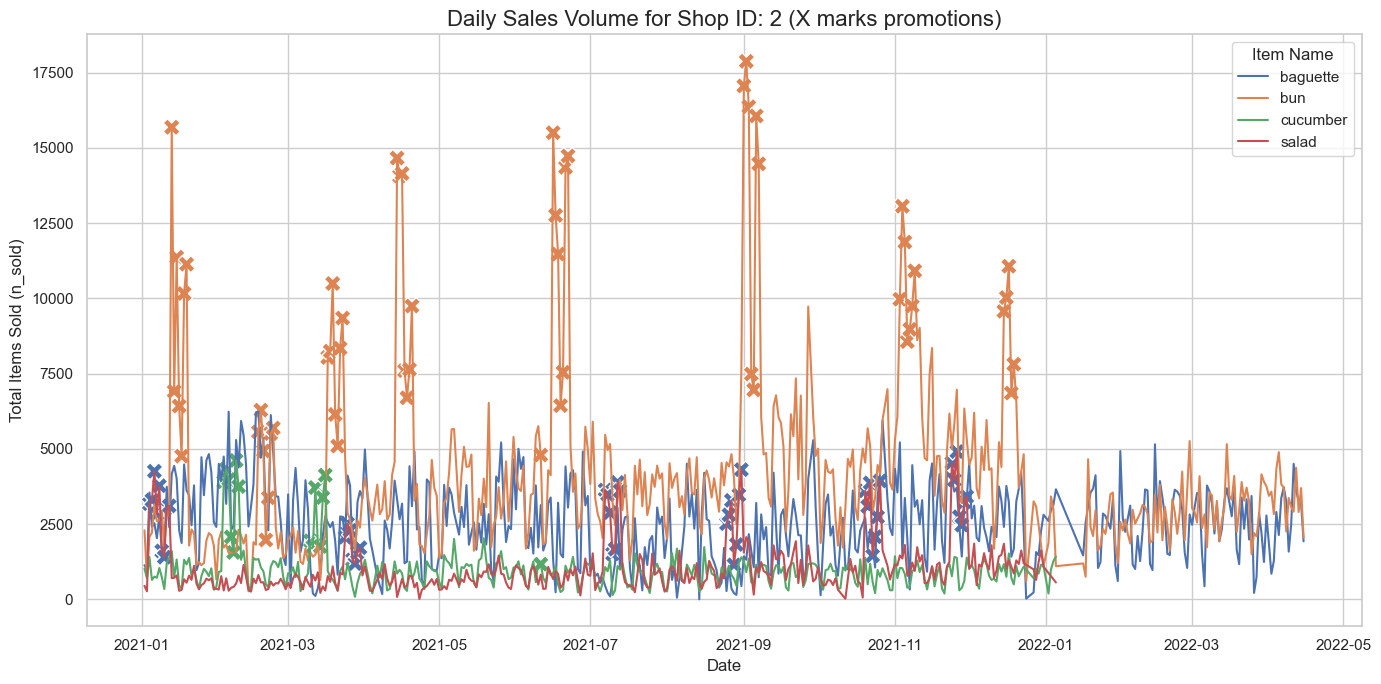

In [68]:
# Generate the graph for Shop 1
plot_shop_sales_with_promotions(df, shop_id=1)

# Generate the graph for Shop 2
plot_shop_sales_with_promotions(df, shop_id=2)

There is a significant outlier on a first graph. Let's try to explore it in more detail.

In [ ]:
# Create a new DataFrame for Shop ID 1, Item 'cucumber', between 2021-04-01 and 2021-06-30 so it is easier to look at
filtered_df = df[
    (df['shop_id'] == 1) &
    (df['item_name'] == 'cucumber') &
    (df['date'] >= '2021-04-20') &
    (df['date'] <= '2021-05-31')
].copy()

# Display the filtered DataFrame
pd.set_option('display.max_rows', None)
print(filtered_df)
pd.reset_option('display.max_rows')

     shop_id       date item_name   n_sold  price  promotion    category
424        1 2021-04-20  cucumber    436.0    8.5      False  Vegetables
428        1 2021-04-21  cucumber    492.0    8.5      False  Vegetables
432        1 2021-04-22  cucumber    632.0    8.5      False  Vegetables
436        1 2021-04-23  cucumber    696.0    8.5      False  Vegetables
440        1 2021-04-24  cucumber    337.0    8.5      False  Vegetables
444        1 2021-04-25  cucumber    410.0    8.5      False  Vegetables
448        1 2021-04-26  cucumber    884.0    8.5      False  Vegetables
452        1 2021-04-27  cucumber    619.0    8.5      False  Vegetables
456        1 2021-04-28  cucumber    476.0    8.5      False  Vegetables
460        1 2021-04-29  cucumber    368.0    8.5      False  Vegetables
464        1 2021-04-30  cucumber    565.0    8.5      False  Vegetables
468        1 2021-05-01  cucumber    470.0    8.5      False  Vegetables
472        1 2021-05-02  cucumber    244.0    8.5  

The problem is in a row with index 500. It seems the number of cucumbers sold is 100 times higher than it was supposed to be. In real life I would try to check if there is an easy way how to look into other sources and what is the number of products sold there. Here I think I will decrease the amount 100 fold because the number seems quite similar to other mondays so it seems logical the true number really should be 100 times lower.

In [73]:
# TODO Missing dates

## Data Cleaning

In [50]:

# Drop unnecessary column, ignore errors if the column does not exist
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Convert date from object to datetime so the code can handle it as a date
df["date"] = pd.to_datetime(df["date"])

# Show all rows that contain at least one missing value
df[df.isnull().any(axis=1)]

,shop_id,date,item_name,n_sold,price,promotion,category
590,1,2021-06-01,salad,NaN,9.9,False,Vegetables
2500,2,2021-08-14,baguette,NaN,3.9,False,Bakery


We could drop the rows with missing values but I think it will be better to try to fill them. 

In [51]:
# Convert the n_sold column to an integer because it has to be whole numbers
df['n_sold'] = df['n_sold'].replace(np.nan, 0)  # Replace NaN with 0 before conversion

In [52]:

# Fill missing values in n_sold with median
df["n_sold"] = df["n_sold"].fillna(df["n_sold"].median())


## Descriptive Statistics

In [53]:
df.describe(include=['object'])

,item_name,category
count,3229,3229
unique,4,2
top,bun,Bakery
freq,902,1803


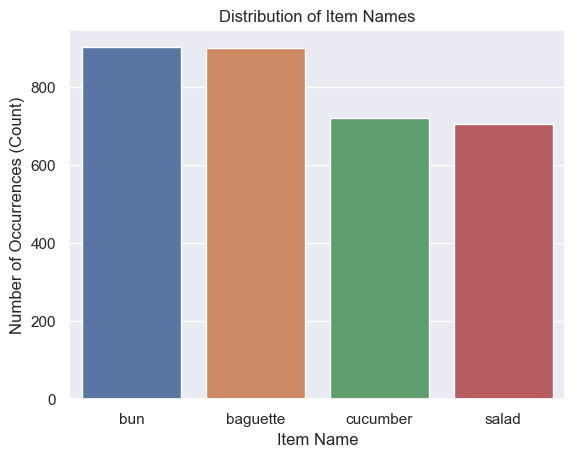

In [54]:
sns.countplot(
    data=df,
    x='item_name',
    order=df['item_name'].value_counts().index
)

# Set the title and labels
plt.title('Distribution of Item Names')
plt.xlabel('Item Name')
plt.ylabel('Number of Occurrences (Count)')
plt.show()

In [55]:
# Group by date and item_name, then SUM the 'n_sold' for each group
daily_item_sales = df.groupby(['date', 'item_name'])['n_sold'].sum().reset_index()

# Display the first few rows of the aggregated data
daily_item_sales.head()

,date,item_name,n_sold
0,2021-01-02,baguette,2477.0
1,2021-01-02,bun,3240.0
2,2021-01-02,cucumber,1383.0
3,2021-01-02,salad,908.0
4,2021-01-03,baguette,2069.0


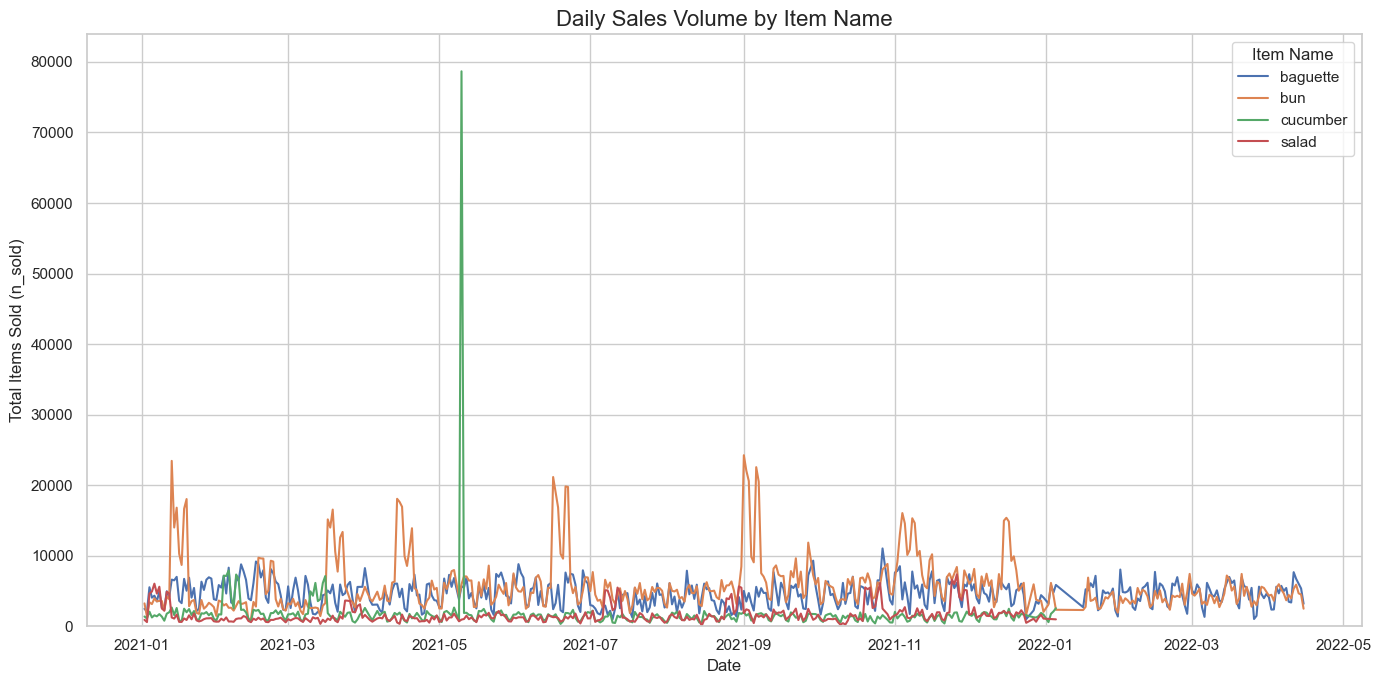

In [56]:
# Set the visual theme and the size of the plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# --- Create the line plot with item_names differentiated by color ---
sns.lineplot(
    data=daily_item_sales,
    x='date',
    y='n_sold',
    hue='item_name'  # Differentiates each item_name with a unique color
)

# --- Set a reasonable Y-axis limit to exclude extreme outliers ---
# Calculate the 99th percentile to find a reasonable upper bound
reasonable_limit = daily_item_sales['n_sold'].quantile(0.99)
plt.ylim(0, reasonable_limit * 5) # Set the limit slightly above the 99th percentile

# --- Set the title and labels ---
plt.title('Daily Sales Volume by Item Name', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Items Sold (n_sold)', fontsize=12)
plt.legend(title='Item Name')

# Display the plot
plt.tight_layout()
plt.show()

In [57]:
def plot_shop_sales_with_promotions(dataframe, shop_id):
    """
    Generates a line plot of daily sales for a specific shop,
    with markers for promotions.
    """
    # --- 1. Filter data for the specific shop ---
    df_shop = dataframe[dataframe['shop_id'] == shop_id].copy()

    # --- 2. Aggregate sales data for the line plot ---
    daily_item_sales = df_shop.groupby(['date', 'item_name'])['n_sold'].sum().reset_index()

    # --- 3. Get data for promotion markers ---
    # Find the dates and items where a promotion occurred
    promotion_dates = df_shop[df_shop['promotion'] == True][['date', 'item_name']].drop_duplicates()
    # Merge with daily sales to get the correct y-value (n_sold) for the markers
    promotion_markers = pd.merge(promotion_dates, daily_item_sales, on=['date', 'item_name'])


    # --- 4. Create the Plot ---
    plt.figure(figsize=(14, 7))

    # Create the base line plot
    sns.lineplot(
        data=daily_item_sales,
        x='date',
        y='n_sold',
        hue='item_name'
    )

    # Overlay the scatter plot markers for promotions
    sns.scatterplot(
        data=promotion_markers,
        x='date',
        y='n_sold',
        hue='item_name',
        marker='X',
        s=150,          # Size of the marker
        color='black',
        legend=False    # Don't create a separate legend for markers
    )

    # --- 5. Set Title and Labels ---
    plt.title(f'Daily Sales Volume for Shop ID: {shop_id} (X marks promotions)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Items Sold (n_sold)', fontsize=12)
    plt.legend(title='Item Name')
    plt.tight_layout()
    plt.show()

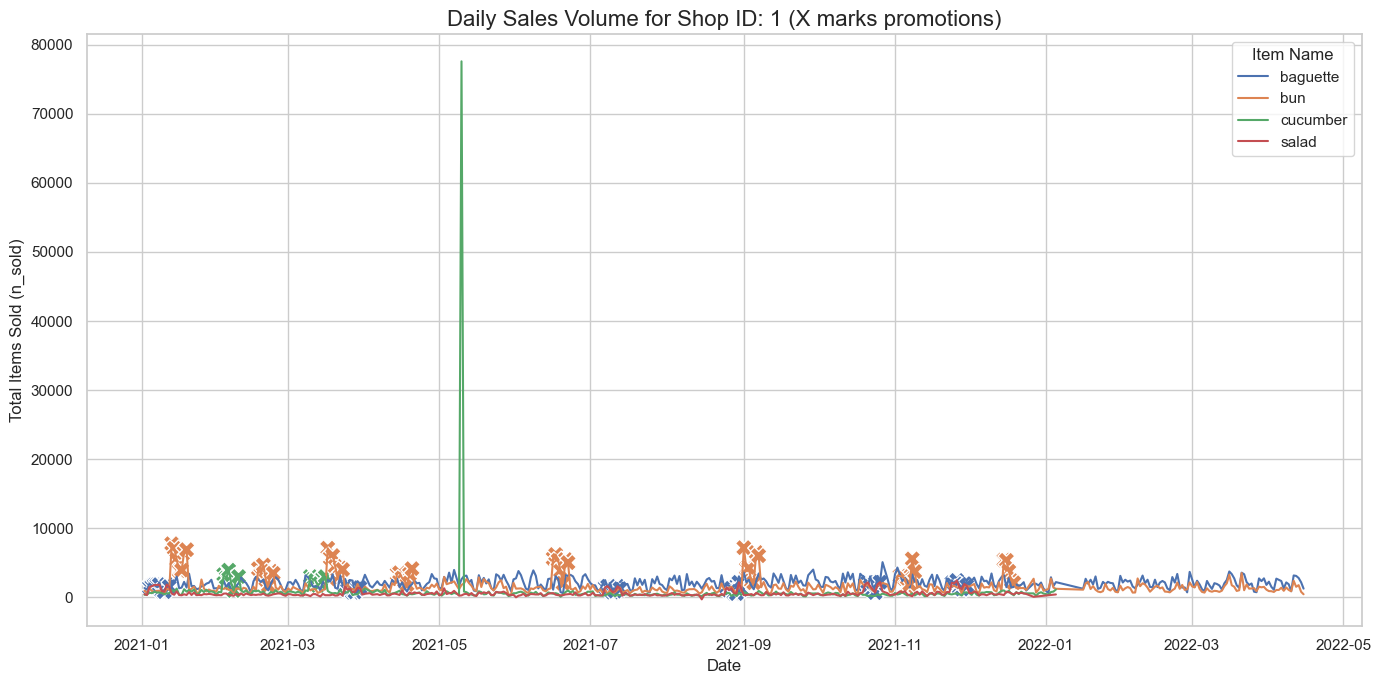

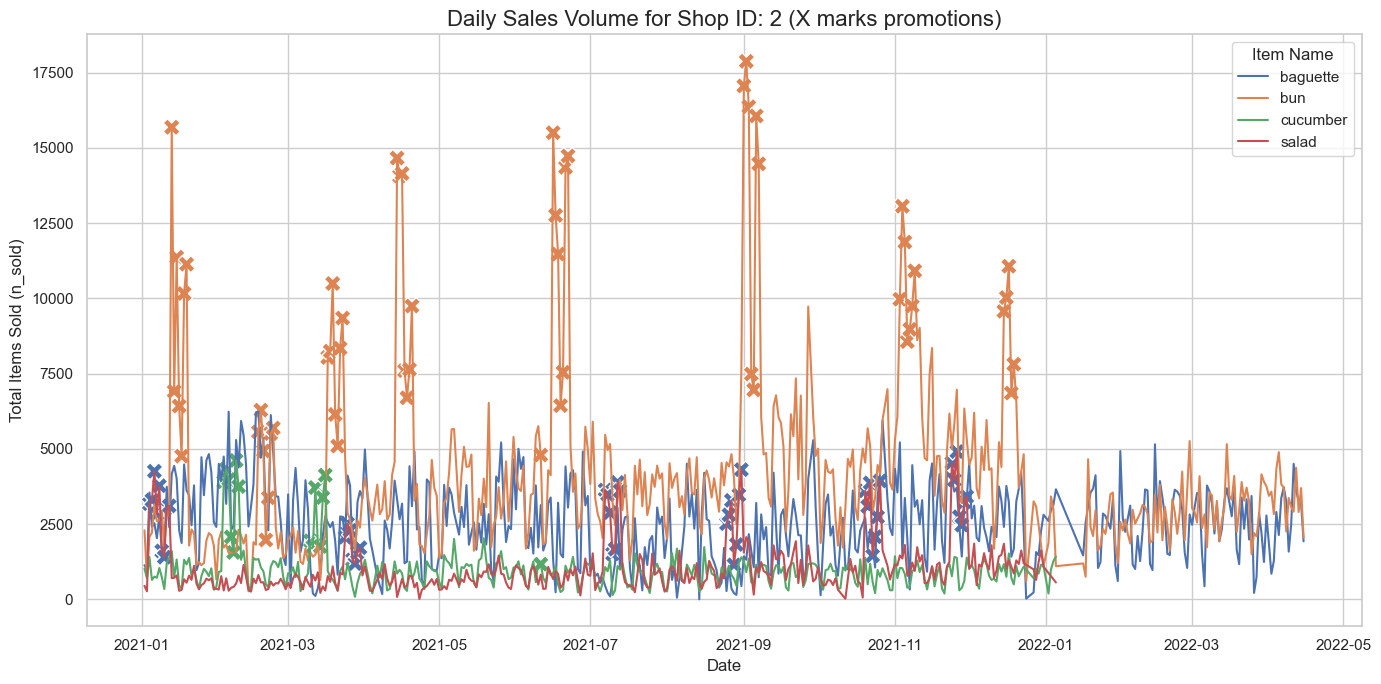

In [58]:
# Generate the graph for Shop 1
plot_shop_sales_with_promotions(df, shop_id=1)

# Generate the graph for Shop 2
plot_shop_sales_with_promotions(df, shop_id=2)

In [59]:

df.describe(include="all")


,shop_id,date,item_name,n_sold,price,promotion,category
count,3229.000000,3229,3229,3229.000000,3229.000000,3229,3229
unique,NaN,NaN,4,NaN,NaN,2,2
top,NaN,NaN,bun,NaN,NaN,False,Bakery
freq,NaN,NaN,902,NaN,NaN,3003,1803
mean,1.499535,2021-07-29 17:43:09.903995136,NaN,1829.338495,6.142948,NaN,NaN
min,1.000000,2021-01-02 00:00:00,NaN,-295.000000,0.000000,NaN,NaN
25%,1.000000,2021-04-14 00:00:00,NaN,650.000000,3.900000,NaN,NaN
50%,1.000000,2021-07-26 00:00:00,NaN,1242.000000,4.500000,NaN,NaN
75%,2.000000,2021-11-06 00:00:00,NaN,2458.000000,8.500000,NaN,NaN
max,2.000000,2022-04-15 00:00:00,NaN,77600.000000,39.000000,NaN,NaN


## Sales & Price Distributions

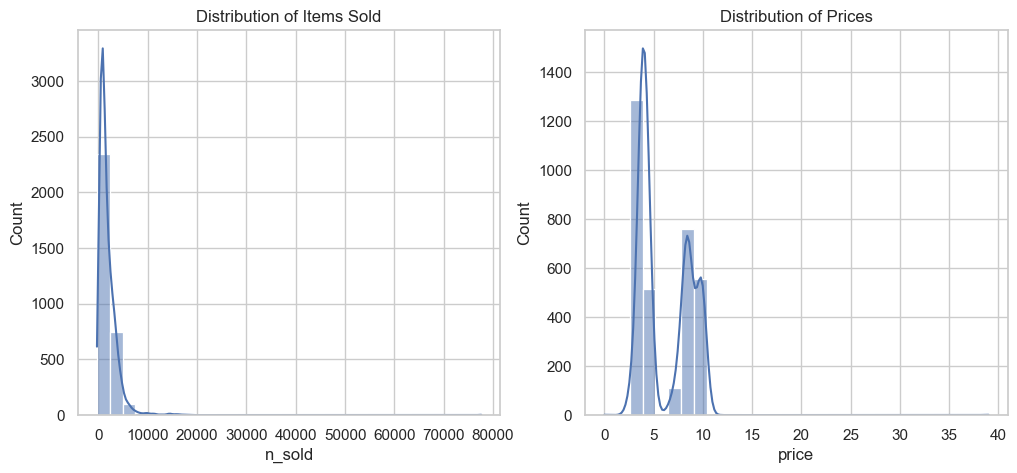

In [60]:

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df["n_sold"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Items Sold")

sns.histplot(df["price"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Prices")

plt.show()


## Category Analysis

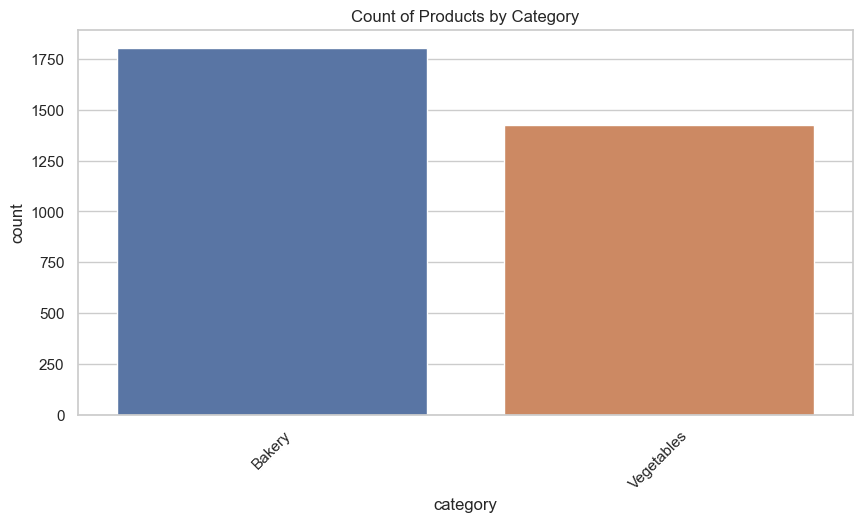

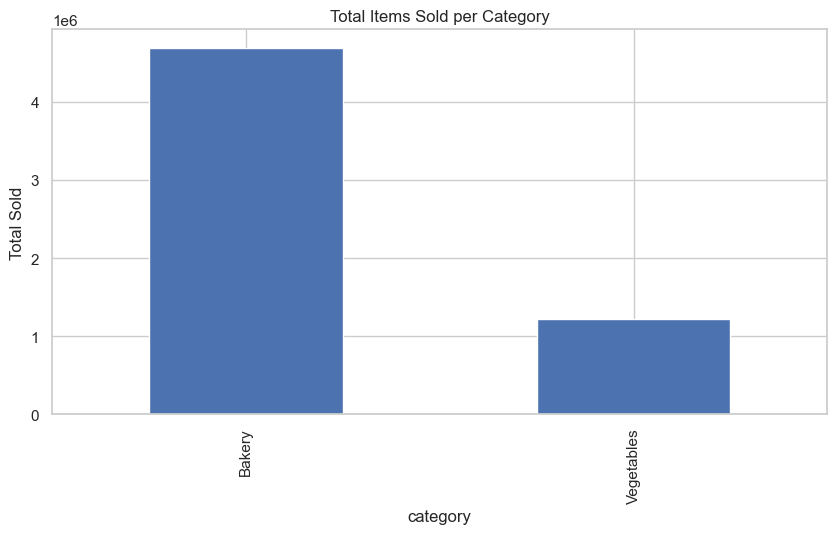

In [61]:

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="category", order=df["category"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Products by Category")
plt.show()

# Top-selling categories
df.groupby("category")["n_sold"].sum().sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Total Items Sold per Category")
plt.ylabel("Total Sold")
plt.show()


## Promotion Impact on Sales

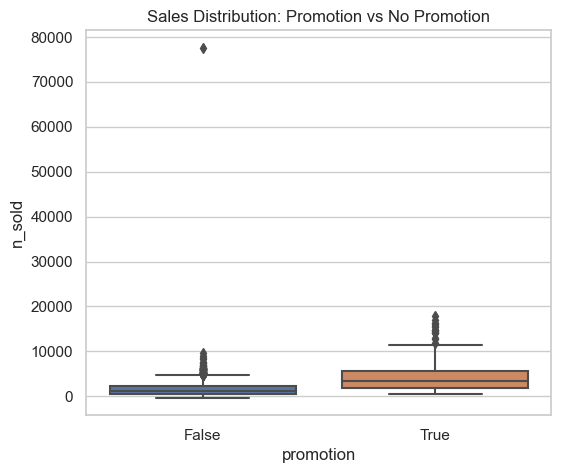

In [62]:

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="promotion", y="n_sold")
plt.title("Sales Distribution: Promotion vs No Promotion")
plt.show()


## Time Series Analysis

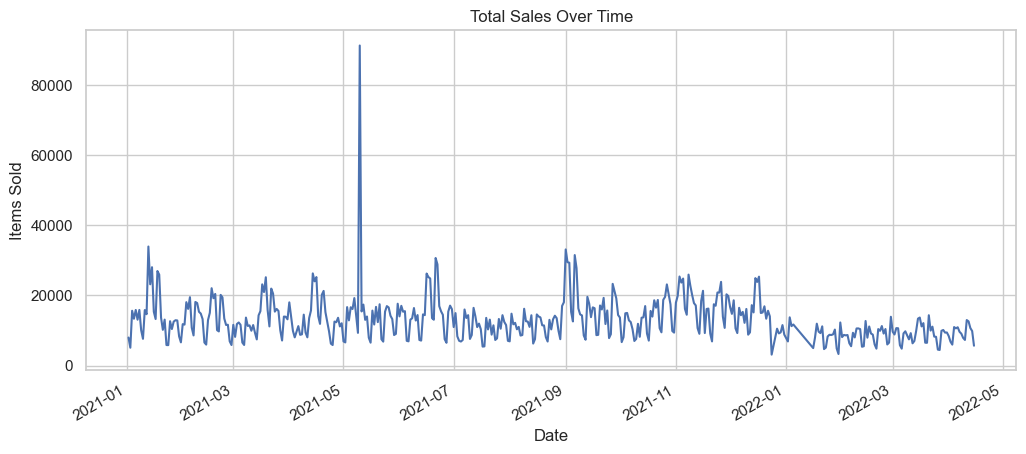

In [63]:

# Aggregate daily sales
daily_sales = df.groupby("date")["n_sold"].sum()

plt.figure(figsize=(12,5))
daily_sales.plot()
plt.title("Total Sales Over Time")
plt.ylabel("Items Sold")
plt.xlabel("Date")
plt.show()


## Shop Performance

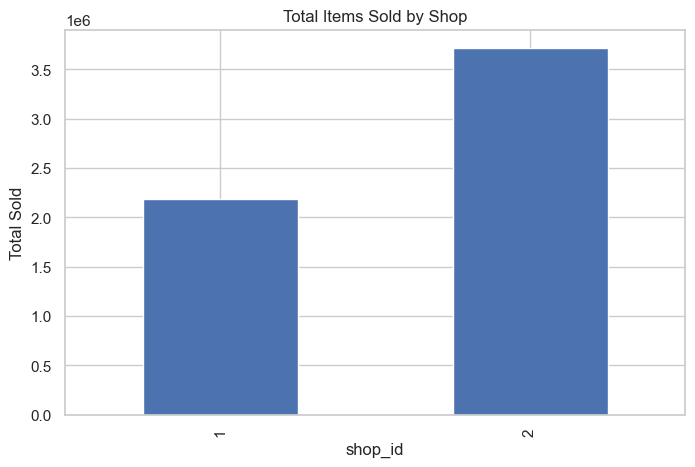

In [64]:

shop_sales = df.groupby("shop_id")["n_sold"].sum()

plt.figure(figsize=(8,5))
shop_sales.plot(kind="bar")
plt.title("Total Items Sold by Shop")
plt.ylabel("Total Sold")
plt.show()


## Correlation Analysis

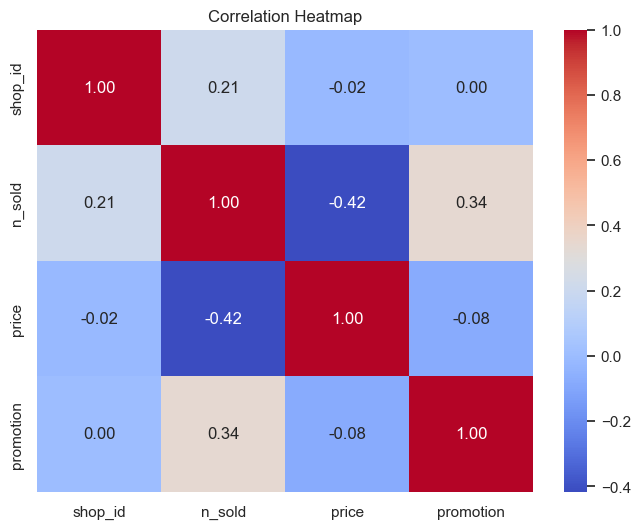

In [65]:

# Compute correlation matrix for numerical features
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
